# Part 1:  Simple linear regression for one independent variable

We will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  The lab use the Ames Housing dataset which is a commonly used machine learning data set for illustrating basic concepts.  

## Loading the data

The Ames housing data set was collected in 2011 and contains information about home sales in Ames, Iowa, including the sale price and numerical and categorical information about each home. We have constructed a "reduced" version of the dataset that is available at:

https://www.chrismusco.com/machinelearning2024_grad/AmesHousing.csv.

More information about the meaning of each column can be found here: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf. Note that our version of the dataset contains a subset of the columns in the original dataset and the last column, SalesPrice, is in units of 1000s of US dollars in our version.

First, complete the following code that uses the `pd.read_csv` command to read the data from the file linked above.

In [23]:
import pandas as pd
import numpy as np
# TODO:  Complete the code
df = pd.read_csv('./housing.csv')

Display the first six rows of the data frame

In [24]:
# TODO
# TODO
df.head(6)

,Lot Area,Year Built,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice
0,31770,1960,441.0,1080.0,1656,0,1656,1,0,3,7,2,2.0,528.0,215.0
1,11622,1961,270.0,882.0,896,0,896,1,0,2,5,0,1.0,730.0,105.0
2,14267,1958,406.0,1329.0,1329,0,1329,1,1,3,6,0,1.0,312.0,172.0
3,11160,1968,1045.0,2110.0,2110,0,2110,2,1,3,8,2,2.0,522.0,244.0
4,13830,1997,137.0,928.0,928,701,1629,2,1,3,6,1,2.0,482.0,189.9
5,9978,1998,324.0,926.0,926,678,1604,2,1,3,7,1,2.0,470.0,195.5


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [25]:
# TODO
res = df.shape
print(f'num samples={res[0]}, num attributes={res[1]}')

num samples=2930, num attributes=15


The dataset contains some NaN value. Before proceeding, drop all rows from the dataframe with NaN values. There should only be a few.

In [26]:
# TODO
df.dropna(inplace=True)
df.shape

(2928, 15)

Create a response vector `y` with the values in the column `SalePrice`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [27]:
# TODO
y = df['SalePrice'].to_numpy()
type(y)

numpy.ndarray

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $120k. Print and label my results.

In [28]:
# TODO
mean_price = y.mean()/1000
print('mean = ', mean_price)
fraction = np.sum(y[y>120000])/len(y)
print('fraction above 120k = ', fraction)

mean =  0.18084103381147543
fraction above 120k =  0.0


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [29]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `TotRms AbvGrd` column, which represents the total number of non-basement rooms in the home.

In [30]:
# TODO
x = df['TotRms AbvGrd'].to_numpy()

Create a scatter plot of the price vs. the `TotRms AbvGrd` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

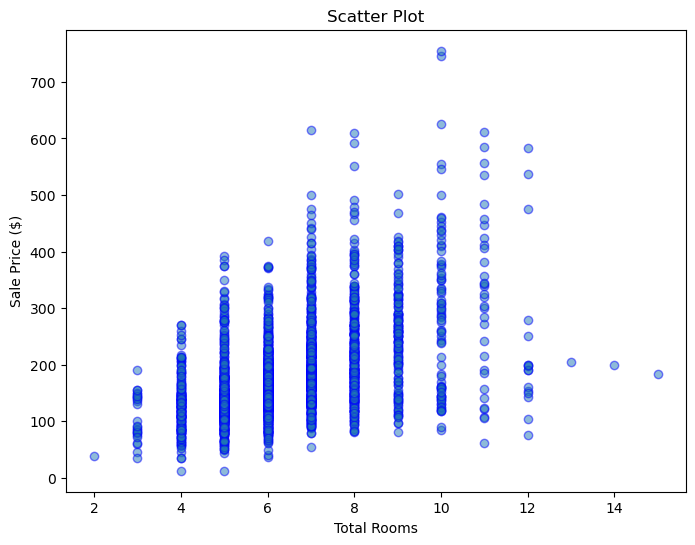

In [31]:
# TODO
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, edgecolors='blue')

plt.title('Scatter Plot')
plt.xlabel('Total Rooms')
plt.ylabel('Sale Price ($)')

plt.show()


## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [32]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x,
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """
    # TODO complete the following code

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    beta1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    beta0 = y_mean - beta1 * x_mean
    loss = np.sum((y - (beta0 + beta1 * x)) ** 2)
    return beta0, beta1, loss

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [33]:
# TODO
beta0, beta1, loss = fit_linear(x,y)
print(f'beta0: {beta0}\nbeta1: {beta1}\nloss: {loss}')

beta0: 18.78067695087958
beta1: 25.149073822759416
loss: 14101634.9287433


Replot the scatter plot above, but now with the regression line.  We will create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

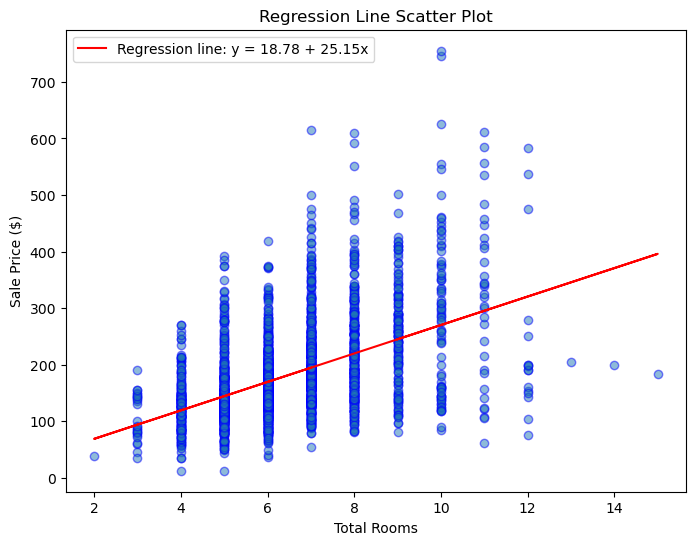

In [34]:
# TODO
yp = beta0 + beta1 * x

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, edgecolor='blue')

plt.plot(x, yp, color='red', label=f'Regression line: y = {beta0:.2f} + {beta1:.2f}x')

plt.title('Regression Line Scatter Plot')
plt.xlabel('Total Rooms')
plt.ylabel('Sale Price ($)')

plt.legend()
plt.show()

# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. My table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    Lot Area           XXXXX
    Overall Qual       XXXXX
    Overall Cond       XXXXX
    ...         ...


What variable does the best job predicting house price?

In [35]:
# TODO
predictors = ['Lot Area', 'Year Built', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area']
squared_losses = {}

for predictor in predictors:
    x = df[predictor].to_numpy()
    _, _, loss = fit_linear(x, y)
    squared_losses[predictor] = loss

loss_table = pd.DataFrame(list(squared_losses.items()), columns=['Attribute', 'Squared Loss'])
loss_table.sort_values(by='Squared Loss', inplace=True)

print(loss_table)

best_predictor = loss_table.iloc[0]['Attribute']
print(f"Best predictor of the house price: {best_predictor}")

        Attribute  Squared Loss
6     Gr Liv Area  9.349293e+06
12    Garage Cars  1.084347e+07
13    Garage Area  1.102283e+07
3   Total Bsmt SF  1.121338e+07
4      1st Flr SF  1.146354e+07
1      Year Built  1.285760e+07
7       Full Bath  1.312070e+07
10  TotRms AbvGrd  1.410163e+07
11     Fireplaces  1.447840e+07
8       Half Bath  1.716632e+07
5      2nd Flr SF  1.732564e+07
0        Lot Area  1.735555e+07
2     Bsmt Unf SF  1.805704e+07
9   Bedroom AbvGr  1.829628e+07
Best predictor of the house price: Gr Liv Area


**TODO:** Describe in words the meaning of the most predictive variable for housing price.

# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

My code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if I did not know these formulas, I could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$.

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,.1)` and $\beta_1$ is in `np.arange(-1,1,.005)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [36]:
def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 I found.
    """
    # TODO complete the following code
    min_loss = np.inf
    beta0 = None
    beta1 = None
    beta0_range = np.arange(-50, 50, 0.1)
    beta1_range = np.arange(-1, 1, 0.005)

    for t_beta0 in beta0_range:
        for t_beta1 in beta1_range:
            loss = np.sum((y - (t_beta0 + t_beta1 * x)) ** 2)
            if loss < min_loss:
                min_loss = loss
                beta0 = t_beta0
                beta1 = t_beta1

    return beta0, beta1, min_loss

Linear loss: 9349292.713520372
Brute-force loss: 9351446.560112998


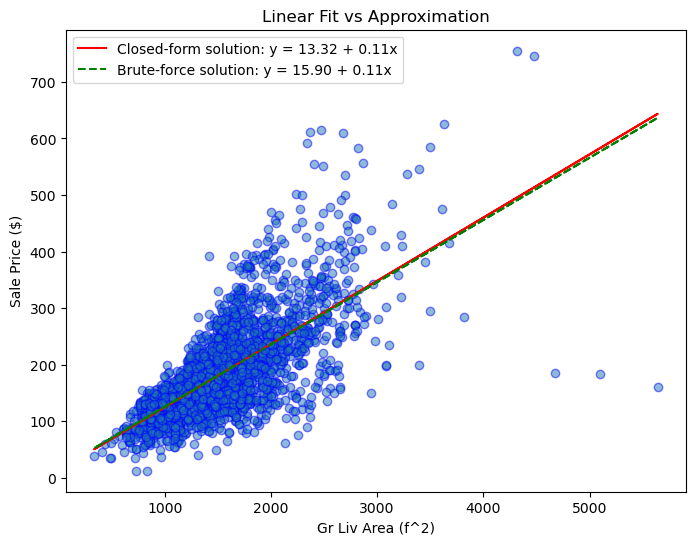

In [37]:
x = df['Gr Liv Area'].to_numpy()
y = df['SalePrice'].to_numpy()

beta0_linear, beta1_linear, loss_linear = fit_linear(x, y)
beta0_approx, beta1_approx, loss_approx = fit_approx(x, y)

print(f"Linear loss: {loss_linear}")
print(f"Brute-force loss: {loss_approx}")

yp_linear = beta0_linear + beta1_linear * x
yp_approx = beta0_approx + beta1_approx * x

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, edgecolor='blue')

plt.plot(x, yp_linear, color='red', label=f'Closed-form solution: y = {beta0_linear:.2f} + {beta1_linear:.2f}x')
plt.plot(x, yp_approx, color='green', linestyle='--', label=f'Brute-force solution: y = {beta0_approx:.2f} + {beta1_approx:.2f}x')

plt.title('Linear Fit vs Approximation')
plt.xlabel('Gr Liv Area (f^2)')
plt.ylabel('Sale Price ($)')

plt.legend()
plt.show()

Compare the output of `fit_approx` and `fit_linear` with `y` being `SalePrice` and `x` being the `Gr Liv Area` variable from our dataset. I should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [38]:
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the least absolute deviations loss.
    """

    # TODO complete the following code
    min_loss = np.inf
    beta0 = None
    beta1 = None
    beta0_range = np.arange(-50, 50, 0.1)
    beta1_range = np.arange(-1, 1, 0.005)

    for t_beta0 in beta0_range:
        for t_beta1 in beta1_range:
            loss = np.sum(np.abs(y - (t_beta0 + t_beta1 * x)))
            if loss < min_loss:
                min_loss = loss
                beta0 = t_beta0
                beta1 = t_beta1

    return beta0, beta1, min_loss

In [39]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x,
    under the max loss.
    """
    # TODO complete the following code
    min_loss = np.inf
    beta0 = None
    beta1 = None
    beta0_range = np.arange(-50, 50, 0.1)
    beta1_range = np.arange(-1, 1, 0.005)

    for t_beta0 in beta0_range:
        for t_beta1 in beta1_range:
            loss = np.max(np.abs(y - (t_beta0 + t_beta1 * x)))
            if loss < min_loss:
                min_loss = loss
                beta0 = t_beta0
                beta1 = t_beta1

    return beta0, beta1, min_loss

**TODO:** Use the algorithm to obtain 3 different linear fits for `SalePrice` with predictor variable `Gr Liv Area`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

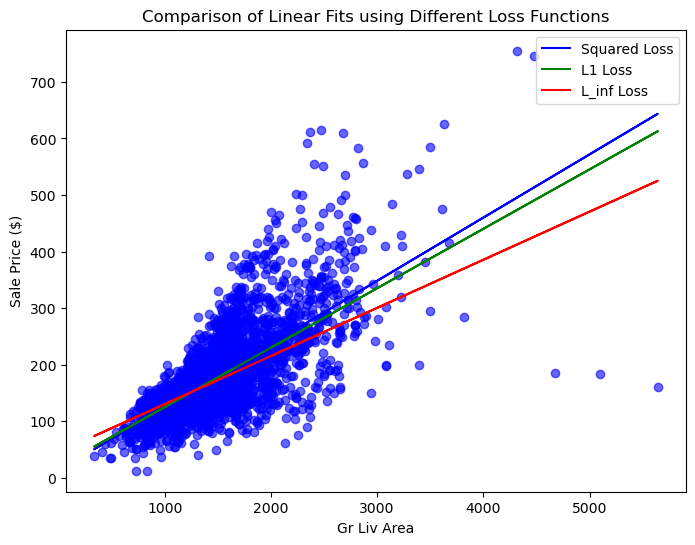

In [40]:
x = df['Gr Liv Area'].to_numpy()
y = df['SalePrice'].to_numpy()

beta0_linear, beta1_linear, loss_linear = fit_linear(x, y)
y_pred_linear = beta0_linear + beta1_linear * x

beta0_l1, beta1_l1, loss_l1 = fit_approx_l1(x, y)
y_pred_l1 = beta0_l1 + beta1_l1 * x

beta0_max, beta1_max, loss_max = fit_approx_max(x, y)
y_pred_max = beta0_max + beta1_max * x

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", alpha=0.6)

plt.plot(x, y_pred_linear, label=f"Squared Loss", color="blue")
plt.plot(x, y_pred_l1, label=f"L1 Loss", color="green")
plt.plot(x, y_pred_max, label=f"L_inf Loss", color="red")

plt.xlabel("Gr Liv Area")
plt.ylabel("Sale Price ($)")
plt.title("Comparison of Linear Fits using Different Loss Functions")

plt.legend()
plt.show()

**TODO:** Repeat the process above for the `Lot Area` predictor variable, which has some more extreme outliers. Note that  this variable has a different scale than `Gr Liv Area` so I might need to adjust my approximate fit functions accordingly.

Again produce a plot that contains three different linear fits for all three different loss functions. Write 1-2 sentences of discussion about how the choice of loss function effected the fit.

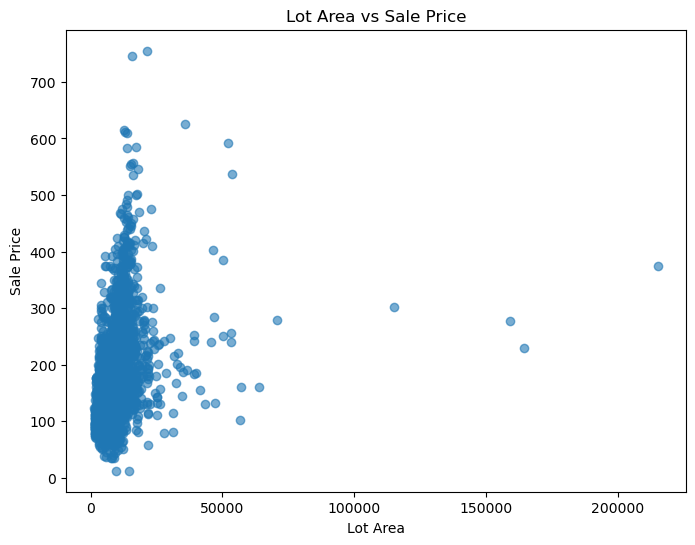

In [41]:
x = df['Lot Area'].to_numpy()
y = df['SalePrice'].to_numpy()
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6)
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.title("Lot Area vs Sale Price")
plt.show()


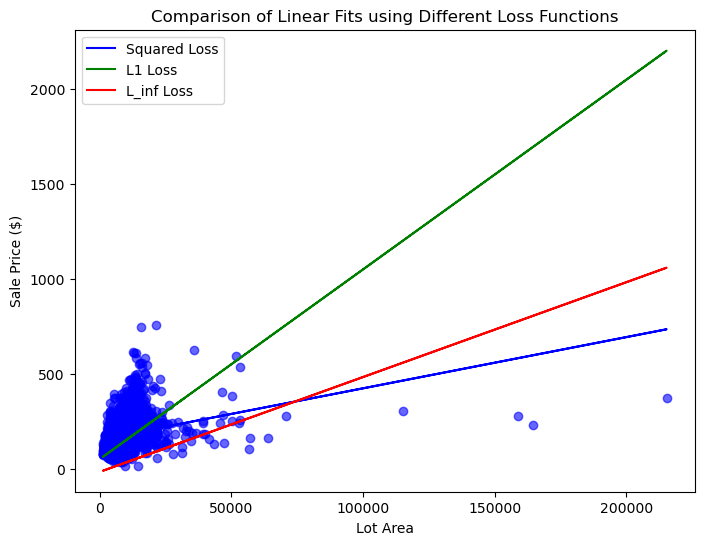

In [42]:
x = df['Lot Area'].to_numpy()
y = df['SalePrice'].to_numpy()

beta0_linear, beta1_linear, loss_linear = fit_linear(x, y)
y_pred_linear = beta0_linear + beta1_linear * x

beta0_l1, beta1_l1, loss_l1 = fit_approx_l1(x, y)
y_pred_l1 = beta0_l1 + beta1_l1 * x

beta0_max, beta1_max, loss_max = fit_approx_max(x, y)
y_pred_max = beta0_max + beta1_max * x

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", alpha=0.6)

plt.plot(x, y_pred_linear, label=f"Squared Loss", color="blue")
plt.plot(x, y_pred_l1, label=f"L1 Loss", color="green")
plt.plot(x, y_pred_max, label=f"L_inf Loss", color="red")

plt.xlabel("Lot Area")
plt.ylabel("Sale Price ($)")
plt.title("Comparison of Linear Fits using Different Loss Functions")

plt.legend()
plt.show()

In [43]:
def fit_approx_l1(x,y):
    min_loss = np.inf
    beta0 = None
    beta1 = None
    beta0_range = np.arange(-100000, 100000, 1000)
    beta1_range = np.arange(-0.05, 0.05, 0.0001)

    for t_beta0 in beta0_range:
        for t_beta1 in beta1_range:
            loss = np.sum(np.abs(y - (t_beta0 + t_beta1 * x)))
            if loss < min_loss:
                min_loss = loss
                beta0 = t_beta0
                beta1 = t_beta1

    return beta0, beta1, min_loss

def fit_approx_max(x,y):
    min_loss = np.inf
    beta0 = None
    beta1 = None
    beta0_range = np.arange(-100000, 100000, 1000)
    beta1_range = np.arange(-0.05, 0.05, 0.0001)

    for t_beta0 in beta0_range:
        for t_beta1 in beta1_range:
            loss = np.max(np.abs(y - (t_beta0 + t_beta1 * x)))
            if loss < min_loss:
                min_loss = loss
                beta0 = t_beta0
                beta1 = t_beta1

    return beta0, beta1, min_loss

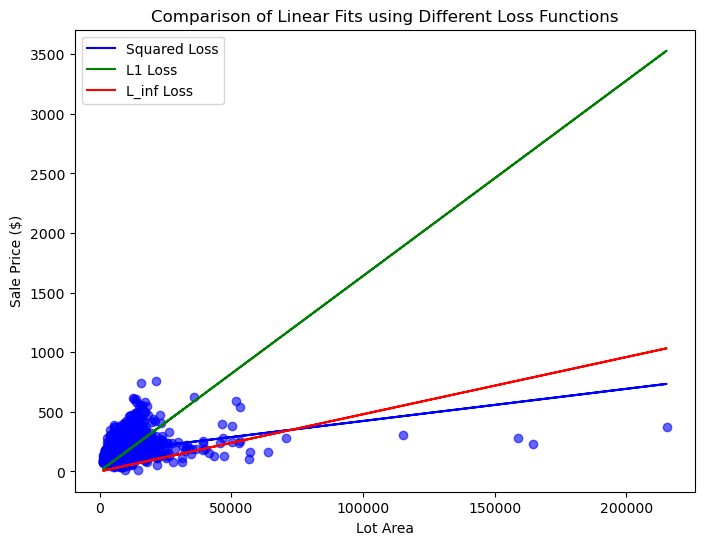

In [44]:
x = df['Lot Area'].to_numpy()
y = df['SalePrice'].to_numpy()

beta0_linear, beta1_linear, loss_linear = fit_linear(x, y)
y_pred_linear = beta0_linear + beta1_linear * x

beta0_l1, beta1_l1, loss_l1 = fit_approx_l1(x, y)
y_pred_l1 = beta0_l1 + beta1_l1 * x

beta0_max, beta1_max, loss_max = fit_approx_max(x, y)
y_pred_max = beta0_max + beta1_max * x

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", alpha=0.6)

plt.plot(x, y_pred_linear, label=f"Squared Loss", color="blue")
plt.plot(x, y_pred_l1, label=f"L1 Loss", color="green")
plt.plot(x, y_pred_max, label=f"L_inf Loss", color="red")

plt.xlabel("Lot Area")
plt.ylabel("Sale Price ($)")
plt.title("Comparison of Linear Fits using Different Loss Functions")

plt.legend()
plt.show()

Write 1-2 sentences of discussion about how the choice of loss function effected the fit.

> Squared Loss (blue): The fit stays close to the majority of data points (due to a lower weight given to extreme outliers).

> L1 Loss (green): The fit is pulled strongly towards the outliers, causing it to generate a very steep slope.

> L inf Loss (red): This fit minimizes the maximum error and tries to balance the influence of outliers with the central data. It balances the extremities.